In [44]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn import ensemble
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = load_digits()

In [13]:
X = pd.DataFrame(data['data'])

In [22]:
y = data['target']

In [31]:
dec_tree = tree.DecisionTreeClassifier()
answer1 = cross_val_score(dec_tree, X, y, cv = 10).mean()
print(answer1)
with open('answer1.txt', 'w') as file:
    file.write(f'{answer1}')

0.8309873152896025


In [37]:
bag_estimator = ensemble.BaggingClassifier(n_estimators = 100)
answer2 = cross_val_score(bag_estimator, X, y, cv = 10).mean()
print(answer2)
with open('answer2.txt', 'w') as file:
    file.write(f'{answer2}')

0.9232547828178728


In [38]:
bag_estimator2 = ensemble.BaggingClassifier(n_estimators = 100, max_features = X.shape[1]**0.5)
answer3 = cross_val_score(bag_estimator, X, y, cv = 10).mean()
print(answer3)
with open('answer3.txt', 'w') as file:
    file.write(f'{answer3}')

0.9254759041672035


In [43]:
dec_tree2 = tree.DecisionTreeClassifier(max_features = 8)
bag_estimator3 = ensemble.BaggingClassifier(base_estimator = dec_tree2, n_estimators = 100)
answer4 = cross_val_score(bag_estimator3, X, y, cv = 10).mean()
print(answer4)
with open('answer4.txt', 'w') as file:
    file.write(f'{answer4}')

0.9494610668662844


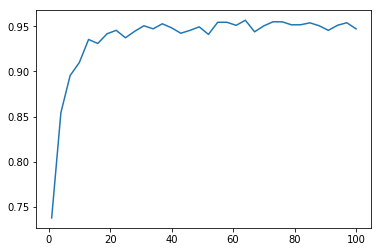

In [50]:
estimator_score = []
for i in np.arange(1, 102, 3):
    forest = ensemble.RandomForestClassifier(n_estimators = i)
    estimator_score.append(cross_val_score(forest, X, y, cv = 10).mean())
plt.plot(np.arange(1, 102, 3), estimator_score)
    

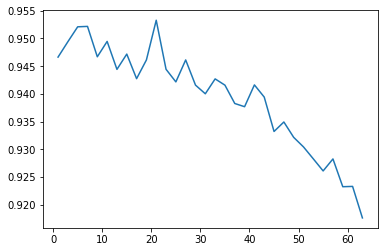

In [47]:
features_score = []
for i in np.arange(1, 64, 2):
    forest = ensemble.RandomForestClassifier(n_estimators = 50, max_features = i)
    features_score.append(cross_val_score(forest, X, y, cv = 10).mean())
plt.plot(np.arange(1, 64, 2), features_score)

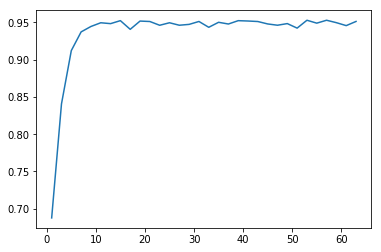

In [48]:
depth_score = []
for i in np.arange(1, 64, 2):
    forest = ensemble.RandomForestClassifier(n_estimators = 50, max_depth = i)
    depth_score.append(cross_val_score(forest, X, y, cv = 10).mean())
plt.plot(np.arange(1, 64, 2), depth_score)